# 15wk-2: 기말고사 (예상문제)

최규빈  
2023-12-11

> **기말고사 관련**
>
> **공지사항**
>
> -   시험일: 12월22일(월)
> -   시험시간: 16:00~17:50
> -   대면/비대면: 전북대 충남대 모두 “대면”시험으로 진행. 줌 필요X
> -   구글검색 허용, ChatGPT 허용
>
> **주의사항**
>
> -   부정행위적발시 기말고사점수 0점 처리함.
> -   본인확인을 위한 학생증 or 신분증을 지참.
> -   모두 대면시험이므로 별도의 준비시간없이 바로 시작함.
> -   질문은 카카오톡 채널을 통해서만 받으며, 대면질문은 받지 않음.
>     (충남대 학생들은 대면질문이 불가능하므로)
> -   지연제출시 5분단위로 감점이 있음. (중간고사때는 조금 늦어도 별도의
>     감점은 없었지만, 다른 학생들과의 형평성에 어긋난다는 피드백이
>     있어서 수정함.) **전북대의 경우 JBNU 와이파이를 이용할시
>     속도이슈가 있으니 개인노트북보다는 실습실의 컴퓨터로 제출하는 것을
>     권장함.**

<a href="https://colab.research.google.com/github/guebin/DV2023/blob/main/posts/15wk-2-fin.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

In [13]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio

In [14]:
pd.options.plotting.backend = "plotly"
pio.templates.default = "plotly_white"

# 1. NYCTaxi 자료 분석 (dashboard) – 100점

아래는 NYCTaxi자료에서 기본적인 전처리를 수행한 데이터프레임이다.

In [136]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2023/main/posts/NYCTaxi.csv").assign(
    log_trip_duration = lambda df: np.log(df.trip_duration),
    pickup_datetime = lambda df: df.pickup_datetime.apply(pd.to_datetime),
    dropoff_datetime = lambda df: df.dropoff_datetime.apply(pd.to_datetime),
    dist = lambda df: np.sqrt((df.pickup_latitude-df.dropoff_latitude)**2 + (df.pickup_longitude-df.dropoff_longitude)**2),
    #---#
    vendor_id = lambda df: df.vendor_id.map({1:'A',2:'B'})
).assign(
    speed = lambda df: df.dist / df.trip_duration,
    pickup_hour = lambda df: df.pickup_datetime.dt.hour,
    dropoff_hour = lambda df: df.dropoff_datetime.dt.hour,
    dayofweek = lambda df: df.pickup_datetime.dt.dayofweek
)
df_small = df[::100].reset_index(drop=True)


주어진 자료를 이용하여 (1)-(3)에 해당하는 시각화를 대시보드로 구현하고,
홈페이지를 남겨라. 답안 예시는 아래와 같다.

`(답안)`

-   <https://guebin.github.io/dash_test/NYCTaxi.html>
-   <https://github.com/guebin/dash_test> // 저는 의도적으로 코드를
    숨겼는데요, 학생들은 `*.qmd` 파일에 답안코드가 존재하는 상태이어야
    합니다.

**주의사항**

-   제출시간 이후에 대시보드 생성을 시도할 경우 부정행위로 간주하여
    기말고사 전체를 0점처리함. (git에 기록남아있음)
-   대시보드 구현이 되어있지 않은 경우 0점 처리함

**힌트**

아래와 같은 양식으로 qmd를 만들면 그림이 중복되어 출력되는 문제[1]가
발생하지 않음.

```` bash
---
title: "NYCTaxi"
author: "최규빈(2021-43052)"
format: dashboard
execute: 
  enabled: true
  cache: false
  freeze: false
---

```{python}
#| output: false
# 여기에 온갖코드를 넣음.
# 1-(1),(2),(3) 에 대응하는 plotly figure를 아래와 같은 이름으로 저장
# fig1 = ...
# fig2 = ...
# fig3 = ...
```

# 기말고사1-(1),(2)

```{python}
#| title: 요일,시간에 따른 평균속력 시각화        
fig1.show()
```

```{python}
#| title: 요일,시간에 따른 평균이동거리 시각화        
fig2.show()
```

# 기말고사1-(3)

```{python}
#| title: 속력별 경로 시각화
fig3.show()
```
````

## `(1)` 요일,시간에 따른 평균속력 시각화 – 25점

자료 `df`에서 시간에 따른 평균속력을 구하고 이를 대시보드에 시각화하라.

**README**

-   요일은 `{0:'월',1:'화',2:'수',3:'목',4:'금',5:'토',6:'일'}`의 규칙에
    따라 변환할 것

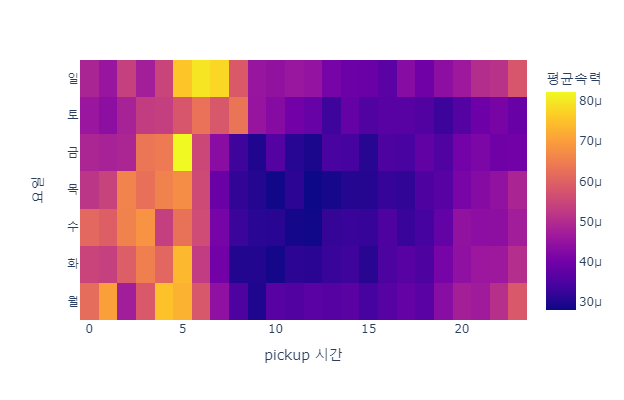

In [146]:
tidydata = df.pivot_table(
    index='pickup_hour',
    columns='dayofweek',
    values='speed',
    aggfunc='mean'
).stack().reset_index().rename({0: 'speed_mean'}, axis=1)

tidydata['dayofweek'] = tidydata['dayofweek'].map({0: '월', 1: '화', 2: '수', 3: '목', 4: '금', 5: '토', 6: '일'})

# Create the heatmap
fig = px.density_heatmap(
    data_frame=tidydata,
    x='pickup_hour',
    y='dayofweek',
    z='speed_mean',
    nbinsx=24,
    nbinsy=7,
    height=400
)
fig.update_layout(
    xaxis_title='pickup 시간',
    yaxis_title='요일',
    coloraxis_colorbar_title = '평균속력'
)

fig.show()


## `(2)` 요일,시간에 따른 평균이동거리 시각화 – 25점

자료 `df`에서 시간에 따른 평균이동거리를 구하고 이를 대시보드에
시각화하라.

**README**

-   요일은 `{0:'월',1:'화',2:'수',3:'목',4:'금',5:'토',6:'일'}`의 규칙에
    따라 변환할 것

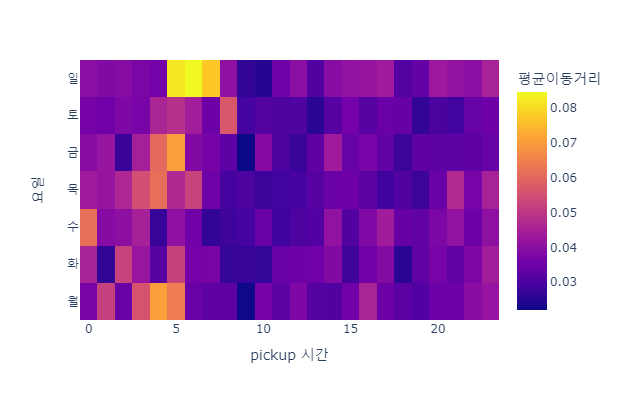

In [145]:
tidydata = df.pivot_table(
    index='pickup_hour',
    columns='dayofweek',
    values='dist',
    aggfunc='mean'
).stack().reset_index().rename({0: 'dist_mean'}, axis=1)

tidydata['dayofweek'] = tidydata['dayofweek'].map({0: '월', 1: '화', 2: '수', 3: '목', 4: '금', 5: '토', 6: '일'})

# Create the heatmap
fig2 = px.density_heatmap(
    data_frame=tidydata,
    x='pickup_hour',
    y='dayofweek',
    z='dist_mean',
    nbinsx=24,
    nbinsy=7,
    height=400
)
fig2.update_layout(
    xaxis_title='pickup 시간',
    yaxis_title='요일',
    coloraxis_colorbar_title = '평균이동거리'
)

fig2.show()

## `(3)` 속력별 경로시각화 – 50점

자료 `df_small`에서 속력을 quatile에 따라 4개의 구간으로 나누고, 구간별
이동경로를 대시보드에 시각화하라.

**README**

-   Zoom = 11 로 설정할것. Figure의 width, height는 설정하지 말것
-   기타 설정값에 대해서는 궁금한것이 있다면 질문할 것


In [140]:
df_small

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,dist,speed,pickup_hour,dropoff_hour,dayofweek
0,id2875421,B,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.120297,0.017680,0.000039,17,17,0
1,id3667993,B,2016-01-03 04:18:57,2016-01-03 04:27:03,1,-73.980522,40.730530,-73.997993,40.746220,N,486,6.186209,0.023482,0.000048,4,4,6
2,id2002463,B,2016-01-14 12:28:56,2016-01-14 12:37:17,1,-73.965652,40.768398,-73.960068,40.779308,N,501,6.216606,0.012256,0.000024,12,12,3
3,id1635353,B,2016-03-04 23:20:58,2016-03-04 23:49:29,5,-73.985092,40.759190,-73.962151,40.709850,N,1711,7.444833,0.054412,0.000032,23,23,4
4,id1850636,A,2016-02-05 00:21:28,2016-02-05 00:52:24,1,-73.994537,40.750439,-74.025719,40.631100,N,1856,7.526179,0.123345,0.000066,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,id0621879,A,2016-04-23 09:31:33,2016-04-23 09:51:33,1,-73.950783,40.743614,-74.006218,40.722729,N,1200,7.090077,0.059239,0.000049,9,9,5
142,id2587483,B,2016-03-28 12:59:58,2016-03-28 13:08:11,2,-73.953903,40.787079,-73.940842,40.792461,N,493,6.200509,0.014127,0.000029,12,13,0
143,id1030598,B,2016-03-03 11:44:24,2016-03-03 11:49:59,1,-74.005066,40.719143,-74.006065,40.735134,N,335,5.814131,0.016022,0.000048,11,11,3
144,id3094934,A,2016-03-21 09:53:40,2016-03-21 10:22:20,1,-73.986153,40.722431,-73.985977,40.762669,N,1720,7.450080,0.040238,0.000023,9,10,0


In [141]:
pcol = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'pickup_hour']
dcol = ['dropoff_datetime', 'dropoff_longitude', 'dropoff_latitude', 'dropoff_hour']
def transform(df):
    pickup = df.loc[:,['id']+pcol].set_axis(['id', 'datetime', 'longitude', 'latitude', 'hour'],axis=1).assign(type = 'pickup')
    dropoff = df.loc[:,['id']+dcol].set_axis(['id', 'datetime', 'longitude', 'latitude', 'hour'],axis=1).assign(type = 'dropoff')
    return pd.concat([pickup,dropoff],axis=0)
df_left = df_small.drop(pcol+dcol,axis=1)
df_right = pd.concat([transform(df) for i, df in df_small.groupby('id')]).reset_index(drop=True)
df_small = df_left.merge(df_right)
df_small


,id,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,log_trip_duration,dist,speed,dayofweek,datetime,longitude,latitude,hour,type
0,id2875421,B,1,N,455,6.120297,0.017680,0.000039,0,2016-03-14 17:24:55,-73.982155,40.767937,17,pickup
1,id2875421,B,1,N,455,6.120297,0.017680,0.000039,0,2016-03-14 17:32:30,-73.964630,40.765602,17,dropoff
2,id3667993,B,1,N,486,6.186209,0.023482,0.000048,6,2016-01-03 04:18:57,-73.980522,40.730530,4,pickup
3,id3667993,B,1,N,486,6.186209,0.023482,0.000048,6,2016-01-03 04:27:03,-73.997993,40.746220,4,dropoff
4,id2002463,B,1,N,501,6.216606,0.012256,0.000024,3,2016-01-14 12:28:56,-73.965652,40.768398,12,pickup
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,id1030598,B,1,N,335,5.814131,0.016022,0.000048,3,2016-03-03 11:49:59,-74.006065,40.735134,11,dropoff
288,id3094934,A,1,N,1720,7.450080,0.040238,0.000023,0,2016-03-21 09:53:40,-73.986153,40.722431,9,pickup
289,id3094934,A,1,N,1720,7.450080,0.040238,0.000023,0,2016-03-21 10:22:20,-73.985977,40.762669,10,dropoff
290,id0503659,B,2,N,1020,6.927558,0.024626,0.000024,1,2016-04-19 18:06:09,-73.952209,40.784500,18,pickup


/root/anaconda3/envs/dv2023/lib/python3.10/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/root/anaconda3/envs/dv2023/lib/python3.10/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



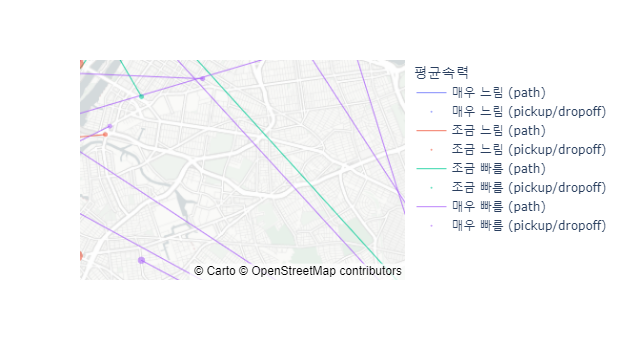

In [147]:
tidydata = df_small2.assign(
    speed_cut = pd.qcut(df_small.speed,4, labels=['매우 느림', '조금 느림', '조금 빠름', '매우 빠름'])
).sort_values('speed_cut')
fig3 = px.line_mapbox(
    data_frame=tidydata,
    lat = 'latitude',
    lon = 'longitude',
    line_group = 'id',
    color = 'speed_cut',
    center = {'lat':40.7322, 'lon':-73.9052},
    #---#
    mapbox_style = 'carto-positron',
    zoom=11,
 )
scatter_data = px.scatter_mapbox(
    data_frame=tidydata,
    lat = 'latitude',
    lon = 'longitude',
    size = 'passenger_count',
    size_max = 10,
    color = 'speed_cut',
    #---#
    mapbox_style = 'carto-positron',
    zoom=11,
).data 

for i, trace in enumerate(fig3.data):
    if trace.mode == 'lines':
        trace.name = f'{trace.name} (path)'

# Scatter 트레이스에 대한 범례 이름 설정
for sd in scatter_data:
    sd.name = f'{sd.name} (pickup/dropoff)'
    fig3.add_trace(sd)

fig3.update_traces(line={'width':1}, opacity=0.8)
fig3.update_layout(legend_title='평균속력')

fig3.show(config={'scrollZoom':False})


**힌트**:

*힌트1*: 아래의 코드를 관찰하세요.

[1] 현재 quarto dashboard가 불완전(정식버전이 아니라 prereleased
version임)하여 생기는 버그인듯합니다

In [7]:
speed = pd.Series([1,1,2,2,3,3,4,4])
print(pd.qcut(speed,4))
print(pd.qcut(speed,4,labels=['매우느림','조금느림','조금빠름','매우빠름']))

0    (0.999, 1.75]
1    (0.999, 1.75]
2      (1.75, 2.5]
3      (1.75, 2.5]
4      (2.5, 3.25]
5      (2.5, 3.25]
6      (3.25, 4.0]
7      (3.25, 4.0]
dtype: category
Categories (4, interval[float64, right]): [(0.999, 1.75] < (1.75, 2.5] < (2.5, 3.25] < (3.25, 4.0]]
0    매우느림
1    매우느림
2    조금느림
3    조금느림
4    조금빠름
5    조금빠름
6    매우빠름
7    매우빠름
dtype: category
Categories (4, object): ['매우느림' < '조금느림' < '조금빠름' < '매우빠름']


*힌트2*: 1-(3)에 해당하는 그림을 생성후 fig3로 저장한후 아래의 코드를
관찰하세요

``` python
for i in range(150):
    print(fig3.data[i].mode)
```

이를 이용하여 legend를 수정하는 방법을 생각해보세요.

In [123]:
for i in range(150):
    print(fig3.data[i].mode)

lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
lines
markers
markers
markers
markers


# 2. 에너지사용량 (지리정보시각화) – 50점

아래는 대한민국의 행정구역을 나타내는 `json` 파일과 2018-2021 기간동안의
에너지사용량이 저장된 url들이다.

    # Json
    https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2018/json/skorea-provinces-2018-geo.json
    https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2018/json/skorea-municipalities-2018-geo.json

    # DataFrame
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2018.csv
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2019.csv
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2020.csv
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2021.csv
    ...
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Busan2018.csv
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Busan2019.csv
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Busan2020.csv
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Busan2021.csv

주어진 자료를 활용하여 아래의 물음에 답하라.

**주의사항**

-   ‘전주시완산구’,’완산구’와 같은 지역명은 ’전주시-완산구’와 같은
    양식으로 정리하라.
-   인천광역시 남구는 새로운 이름인 미추홀구로 변경하라.

**힌트**

문제가 되는 지역명을 정리하면 아래와 같다.

In [11]:
s = pd.Series(['인천광역시-미추홀구',
               '경기도-고양시-덕양구','경기도-고양시-일산동구','경기도-고양시-일산서구',
               '경기도-성남시-분당구','경기도-성남시-수정구','경기도-성남시-중원구',
               '경기도-수원시-권선구','경기도-수원시-영통구', '경기도-수원시-장안구', '경기도-수원시-팔달구',
               '경기도-안산시-단원구', '경기도-안산시-상록구',
               '경기도-안양시-동안구', '경기도-안양시-만안구',
               '경기도-용인시-기흥구', '경기도-용인시-수지구', '경기도-용인시-처인구',
               '경상남도-창원시-마산합포구', '경상남도-창원시-마산회원구', '경상남도-창원시-성산구', '경상남도-창원시-의창구', '경상남도-창원시-진해구',
               '경상북도-포항시-남구', '경상북도-포항시-북구',
               '전라북도-전주시-덕진구', '전라북도-전주시-완산구',
               '충청남도-천안시-동남구', '충청남도-천안시-서북구',
               '충청북도-청주시-상당구', '충청북도-청주시-서원구', '충청북도-청주시-청원구', '충청북도-청주시-흥덕구'])

## `(1)` 에너지사용량차이(전기-도시가스) 시각화 – 25점

`에너지사용량(TOE)/전기`와 `에너지사용량(TOE)/도시가스`의 차이를
계산하여 `에너지사용량차이(전기-도시가스)`라는 새로운 열로 추가하라.
수도권지역에 한정하여 `에너지사용량차이(전기-도시가스)`를 시각화하라.
시각화를 위해 `plotly`의 `choropleth_mapbox`를 사용하고, 다음 요구사항을
충족시켜라.

-   색상은 `에너지사용량차이(전기-도시가스)` 값에 따라 달라져야 하며,
    색상 범위(`range_color`)는 해당 열의 최소값과 최대값으로 설정하라.
-   애니메이션 프레임은 `년도`를 기준으로 하라.
-   호버 데이터는 `시도`와 `지역`을 포함해야 한다.
-   투명도는 0.5로 설정하라.
-   지도 스타일은 ’carto-positron’을 사용하며, 중심 좌표는 위도
    37.5642135, 경도 127.0016985로 설정하라.
-   지도의 줌 레벨은 7.5로, 높이는 800, 너비는 750으로 설정하라.
-   스크롤 줌 기능은 비활성화하라.

시각화예시는 아래와 같다.

In [12]:
fig = pio.from_json(requests.get('https://raw.githubusercontent.com/guebin/DV2023/main/posts/figure_21.json').text)
pio.show(fig,config={'scrollZoom':False})

NameError: name 'requests' is not defined

**주의사항**

-   수도권지역은 서울,경기,인천을 의미한다.
-   호버데이터시 ‘고양시-덕양구’와 같은 양식이 아니라 ’고양시덕양구’
    혹은 ’덕양구’와 같은 방식으로 호버될 경우 0점 처리함. (인천광역시의
    미추홀구 역시 구지명(인천광역시 남구)로 호버될경우 0점처리함)

> **에너지사용량 정답오류 수정 2023-12-16 9:30 AM**
>
> 기존의 정답이 에너지사용량을 올바르게 계산하지 않고 있어
> 수정하였습니다. 오류는 한혜지 학생의 도움으로 찾을 수 있었습니다.
> 현재는 해당오류내용이 수정되었습니다.

## `(2)` (서울+김포)특별시? – 25점

김포시의 서울편입이슈에 대한 아래의 제시문을 읽으라.

> **김포시의 서울편입 이슈**
>
> 김포시를 서울특별시로 편입하자는 주장에 대한 논의가 활발해졌다. 2023년
> 10월 23일, 국민의힘 소속 김포 지역 정치인들이 2026년 신설 예정인
> 경기북부특별자치도에 김포시가 포함되는 것에 반대하며 서울특별시 편입을
> 제안했다. 이 제안은 국민의힘 지도부의 호응을 받았고, 이로 인해 10월
> 30일에는 이 문제가 국민의힘 내에서 중요한 논의 주제로 부상했다. 이후,
> 이 주제는 제22대 국회의원 선거의 중요한 정치적 이슈로 자리 잡으며,
> 많은 논쟁과 대중의 관심을 불러일으켰다. 이러한 정치적 변화는 한국 정치
> 무대에서 논쟁의 새로운 중심점이 되었으며, 김포시의 행정적 미래에 대한
> 광범위한 토론을 촉발하고 있다.

김포시가 서울시에 편입되었다고 가정하고, (서울+김포)특별시 내 각 구별
`에너지사용비율`을 아래의 수식을 참고하여 연도별로 계산하라.

> **Note**
>
> 2018년 김포시의 `에너지사용비율`, 2018년 서울시 서초구의
> `에너지사용비율`은 각각 아래와 같이 계산한다.
>
> -   $\text{에너지사용비율}_{\text{김포시,2018}} = \frac{\text{에너지사용량}_\text{김포시,2018}}{\text{에너지사용량}_\text{김포시,2018}+\text{에너지사용량}_\text{서울시강남구,2018}+...+\text{에너지사용량}_\text{서울시중랑구,2018}}$
> -   $\text{에너지사용비율}_{\text{서울시서초구,2018}} = \frac{\text{에너지사용량}_\text{서울시서초구,2018}}{\text{에너지사용량}_\text{김포시,2018}+\text{에너지사용량}_\text{서울시강남구,2018}+...+\text{에너지사용량}_\text{서울시중랑구,2018}}$
>
> 이때 에너지사용량은 전기,도시가스,지역난방의 합을 의미한다. 계산된
> 데이터를 바탕으로, 구별 `에너시사용비율`을 시각화 하라. 시각화를 위해
> `plotly`의 `choropleth_mapbox`를 사용하고, 다음 요구사항을 충족시켜라.
>
> -   색상은 ’에너지사용비율’에 따라 달라져야 하며, `range_color`는
>     `에너시사용비율` 열의 최소값과 최대값으로 설정하라.
> -   애니메이션 프레임은 ’년도’를 기준으로 설정하라.
> -   호버 데이터에는 ’시도’와 ’지역’을 포함시켜라.
> -   지도의 투명도는 0.5로 설정하라.
> -   지도 스타일은 ’carto-positron’을 사용하고, 중심 좌표는 위도
>     37.5612, 경도 126.8228로 설정하라.
> -   지도의 줌 레벨은 9로, 높이는 800, 너비는 750으로 설정하라.
> -   스크롤 줌 기능은 비활성화라.
>
> 시각화 예시는 아래와 같다.